<a href="https://colab.research.google.com/github/Pree-om/deep-learning/blob/main/MNISTDigitClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

THIS IS A WAY IMAGE PROCESSING SHOULDN'T BE DONE USING MLP

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from keras.datasets import mnist

In [2]:
(train_img, train_labels), (test_img, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
print(train_img.shape)
print(test_img.shape)

(60000, 28, 28)
(10000, 28, 28)


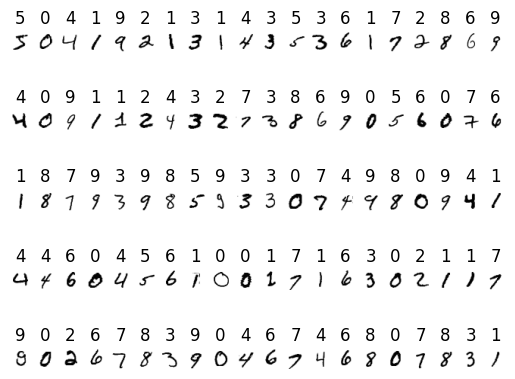

In [4]:
for i in range(100):
  plt.subplot(5, 20, i+1)
  plt.imshow(train_img[i], cmap='gray_r') #to show images
  plt.title(train_labels[i])
  plt.subplots_adjust(hspace=0.5)
  plt.axis('off')
plt.show()

In [5]:
print(train_img[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [6]:
m,n = train_img[0].shape

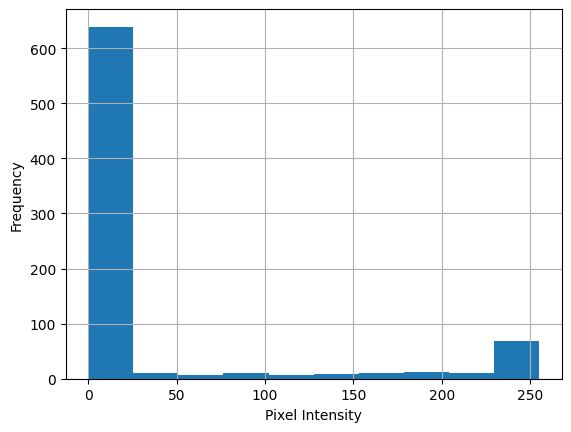

In [7]:
plt.hist(train_img[0].reshape(m*n)) #reshaped as it's a vector
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid()
plt.show()

0: Black, 253: Grey(Brightest)

In [8]:
#Scaling it to avaoid gradient explosion
train_img = train_img/255
test_img = test_img/255
print(train_img[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

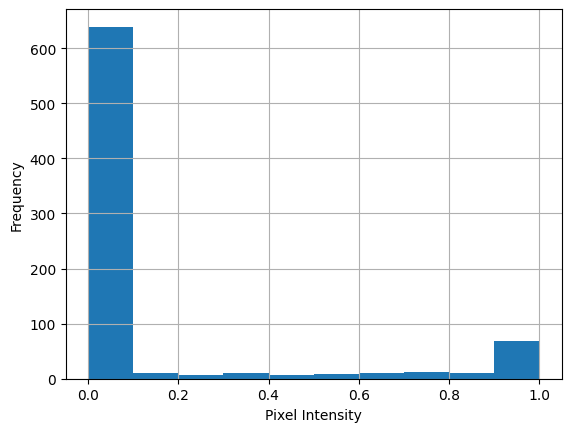

In [9]:
plt.hist(train_img[0].reshape(m*n)) #reshaped as it's a vector
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid()
plt.show()

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

model = Sequential()
model.add(Flatten(input_shape=(m,n))) #2D -> 1D
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax')) # for classification, 10 classes as digits from 0 to 9

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# compilation and training
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_img, train_labels, epochs=30) #fits models to data(TRAINING), model.fit(input, output, epochs=10)

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9060 - loss: 0.3114
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9759 - loss: 0.0789
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9828 - loss: 0.0537
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9877 - loss: 0.0396
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9901 - loss: 0.0310
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9914 - loss: 0.0273
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9929 - loss: 0.0216
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9942 - loss: 0.0187
Epoch 9/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9938 - loss: 0.0218
Epoch 10/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9954 - loss: 0.0152
Epoch 11/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9952 - loss: 0.0157
Epoch 12/30
1875/1875 ━━━━━━

In [12]:
#train
loss, accuracy = model.evaluate(train_img, train_labels)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9989 - loss: 0.0042
Loss: 0.004668571054935455
Accuracy: 0.9987499713897705


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted: 7


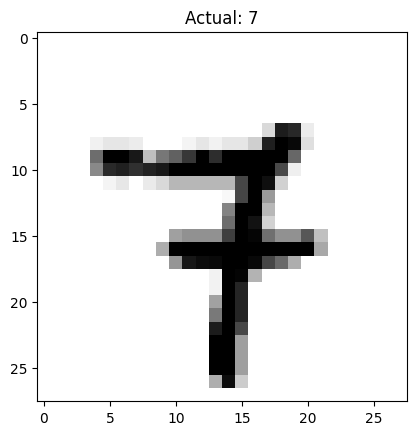

In [19]:
index = 75
plt.imshow(test_img[index], cmap='gray_r')
plt.title(f'Actual: {test_labels[index]}')

predict = model.predict(test_img[index].reshape(1,m,n))
print(f'Predicted: {np.argmax(predict[0])}')